## **PART A: CS 5890/6890 - Grads and Undergrads**


**Hello Temporal Data Mining Class, and Welcome to Assignment 1. !**


In this assignment, we will explore the Time series decomposition library in python and apply the knowledge we have seen in the class.
*Ready, Set, Go...*
You are a brilliant scientist that works at NOAA ( National Aceanic & atmospheric administration), and part of your job is to analyse the precipitation data in different regions in the country. Today your job is to analyze the precipitation time series in the "Salmon River".

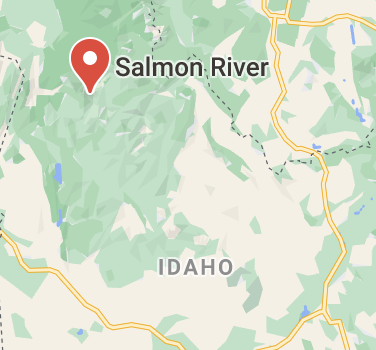

Let's start first by importing all the package that we need in this homework. ( Do not forget to run every code block)
Make sure to replace # INSERT CODE HERE by your code. 

In [1]:
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf
import statsmodels.api as sm
import pandas as pd
import pandas.util.testing as tm
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Now let's add the data file** in the sample_data folder of the Files tab (in the left corner)

We will then read the CSV data that we just uploaded from the python script 

In [3]:
data = pd.read_csv('sample_data/Precipitation.csv')

# Print the data file using the following comand         print(data)

# Visualize the uploaded data file using the following comand         plt.plot(data)

Let's decompose the newly read time series data into its different components using the TSA python library

In [6]:
# Freq parameter refers to the number of points taken into account when computing the moving average (in this case we use 21 points, (2K+1=21))
decompose_result = seasonal_decompose(data, freq= 21, model="additive")

# To get different  components of the TS use the following:
# decompose_result.trend or decompose_result.seasonal or decompose_result.resid

trend = decompose_result.trend
seasonal = decompose_result.seasonal
residual = decompose_result.resid

Plot all the TS extracted components

In [ ]:
decompose_result.plot()

We will inspect the autocorollation plot (ACF) to check whether there is any uncovered trend or seasonality

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


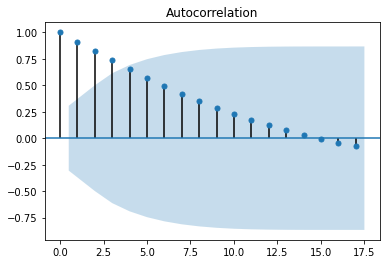

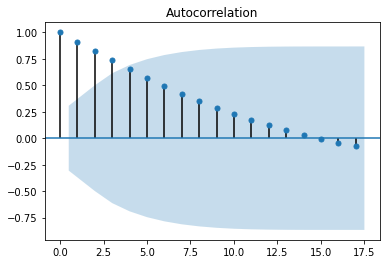

In [7]:
# You can compute the ACF plot using the following command:    acf(data)
ACF = acf(data) 
sm.graphics.tsa.plot_acf(ACF)

**Wonderful :)!**

*In case the ACF reveals the same behavior that you are expecting, let's keep moving...*

We will check the Extracted trend values. Notice that there are "**K**" elements with missing values (NAN values) at the beginning and at the end of the trend series that corresponds to the formula we have seen in class:

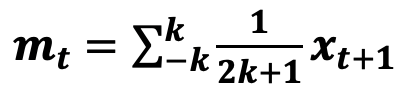



In [9]:
# You can print the trend component using              print(trend.values)
print(trend.values)

[[        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [93.00028571]
 [92.46809524]
 [91.93590476]
 [91.40371429]
 [90.87152381]
 [90.33933333]
 [89.79504762]
 [89.22657143]
 [88.63390476]
 [88.0412381 ]
 [87.46066667]
 [86.88009524]
 [86.38419048]
 [85.98504762]
 [85.67057143]
 [85.38028571]
 [85.09      ]
 [84.79971429]
 [84.52152381]
 [84.29171429]
 [84.11028571]
 [83.95304762]
 [83.79580952]
 [83.63857143]
 [83.48133333]
 [83.28780952]
 [83.00961905]
 [82.71933333]
 [82.4532381 ]
 [82.21133333]
 [81.96942857]
 [81.72752381]
 [81.49771429]
 [81.26790476]
 [81.03809524]
 [80.80828571]
 [80.59057143]
 [80.38495238]
 [80.20352381]
 [80.03419048]
 [79.87695238]
 [79.71971429]
 [79.55038095]
 [79.39314286]
 [79.23590476]
 [79.07866667]
 [78.95771429]
 [78.92142857]
 [78.90933333]
 [78.86095238]
 [78.72790476]
 [78.59485714]
 [78.46180952]
 [78.25619048]
 [77.99009524]
 [77.71190476]
 [77.40952

Before detrending the original data, remove the k missing values from the trend and original data signals

In [21]:
# First remove the K missing values from the trend components and their corresponding values in the original data
K = 0
K = 1
K = 2
K = 3
K = 4
K = 5
K = 6
K = 7
K = 8
K = 9
K = 97
K = 98
K = 99
K = 100
K = 101
K = 102
K = 103
K = 104
K = 105
K = 106
K = 107


data = data[K:len(data)-K]
trend = trend[K:len(trend)-K]

Detrend the original data by substracting the extracted trend from the data and plot the detrended data

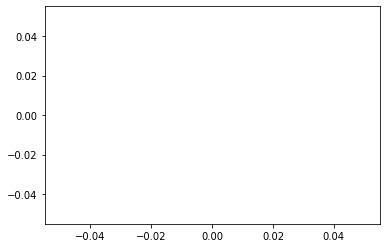

In [22]:
detrend = [d-t for d,t in zip(data.values,trend.values)]

# Plot the detrended line using the following:    plt.plot(detrend)
plt.plot(detrend)

Check whether your computations are correct by computing the detrended data using by addding (seasonality plus residual)


[[            nan]
 [            nan]
 [            nan]
 [            nan]
 [            nan]
 [            nan]
 [            nan]
 [            nan]
 [            nan]
 [            nan]
 [ 3.01171429e+00]
 [ 1.76590476e+00]
 [ 2.66095238e-01]
 [-9.79714286e-01]
 [-1.20952381e+00]
 [-9.31333333e-01]
 [-8.95047619e-01]
 [-8.34571429e-01]
 [-1.51190476e+00]
 [-1.93523810e+00]
 [-1.86266667e+00]
 [-1.53609524e+00]
 [-1.04019048e+00]
 [-6.41047619e-01]
 [-3.26571429e-01]
 [-3.62857143e-02]
 [ 1.42108547e-14]
 [-2.17714286e-01]
 [-4.47523810e-01]
 [-2.17714286e-01]
 [-3.62857143e-02]
 [-1.33047619e-01]
 [ 2.41904762e-02]
 [ 1.81428571e-01]
 [ 3.38666667e-01]
 [ 2.78190476e-01]
 [ 3.02380952e-01]
 [ 8.46666667e-02]
 [ 9.67619048e-02]
 [ 8.46666667e-02]
 [ 3.26571429e-01]
 [ 5.68476190e-01]
 [ 5.44285714e-01]
 [ 7.74095238e-01]
 [ 1.00390476e+00]
 [ 4.71714286e-01]
 [-1.08857143e+00]
 [-1.39095238e+00]
 [-1.20952381e+00]
 [-1.04019048e+00]
 [-8.82952381e-01]
 [-7.25714286e-01]
 [-5.5638095

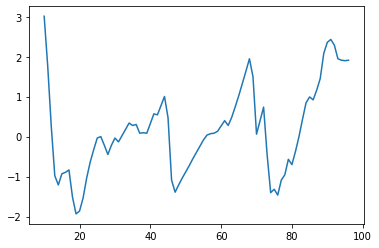

In [25]:
detrend_data = residual.values + seasonal.values 
# Print the new detrend_data  
print(detrend_data)

# Plot and show the new detrend_data plot 
plt.plot(detrend_data)

### **PART B: CS 6890 -  GRADUATE STUDENTS EXTRA 🌶️:**

**EXTRA 1:**
Implement a function called get_MovingAverage that takes 2 arguments:
- data: the original data time series
- k : that helps you find how many elements the MA should consider
The function should return the detrended data 

**Remember:** the number of points considered in every window of the moving average is 2K+1

In [ ]:
def get_MovingAverage(data, K):
  detrended = []
  # INSERT CODE HERE.   To get the average of a list (for example [1,2,3]) use np.mean([1,2,3])

  return detrended


# When done, uncomment the code below, you should get the same results of the TSA library
# detrended = get_MovingAverage(data, 10)
# plt.plot(detrended)
# plt.show()


**EXTRA 2:** Implement a function called get_MovingMedian that takes 2 arguments:

data: the original data time series
k : that helps you find how many elements the MM should consider The function should return the detrended data

**Remember:** the number of points considered in every window of the moving average is 2K+1

In [ ]:
def get_MovingMedian(data, K):
  detrended = []
  # INSERT CODE HERE.  To get the median of a list (for example [1,2,3])  use np.median([1,2,3])

  return detrended

# When done, uncomment the code below
# detrended = get_MovingMedian(data, 10)
# plt.plot(detrended)
# plt.show()